# Exploratory Data Analysis (EDA) Tutorial

## 1. Introduction

### Importance of EDA in the data science workflow

EDA helps in understanding the dataset, identifying patterns, and gaining insights that guide further analysis and modeling.

### Overview of the tutorial and the dataset used

- In this tutorial, we will perform EDA on the California Housing dataset from scikit-learn.
- The dataset contains information about housing prices in California based on various features.



## 2. Loading and Preprocessing the Dataset

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the California Housing dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['PRICE'] = california.target

In [3]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Initial data preprocessing
# Check for missing values
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [5]:
# Descriptive statistics
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## 3. Univariate Analysis

In [6]:
# Descriptive Statistics
# Calculate and interpret measures of central tendency and dispersion
print("Mean price:", data['PRICE'].mean())
print("Median price:", data['PRICE'].median())
print("Standard deviation of price:", data['PRICE'].std())

Mean price: 2.068558169089147
Median price: 1.797
Standard deviation of price: 1.1539561587441387


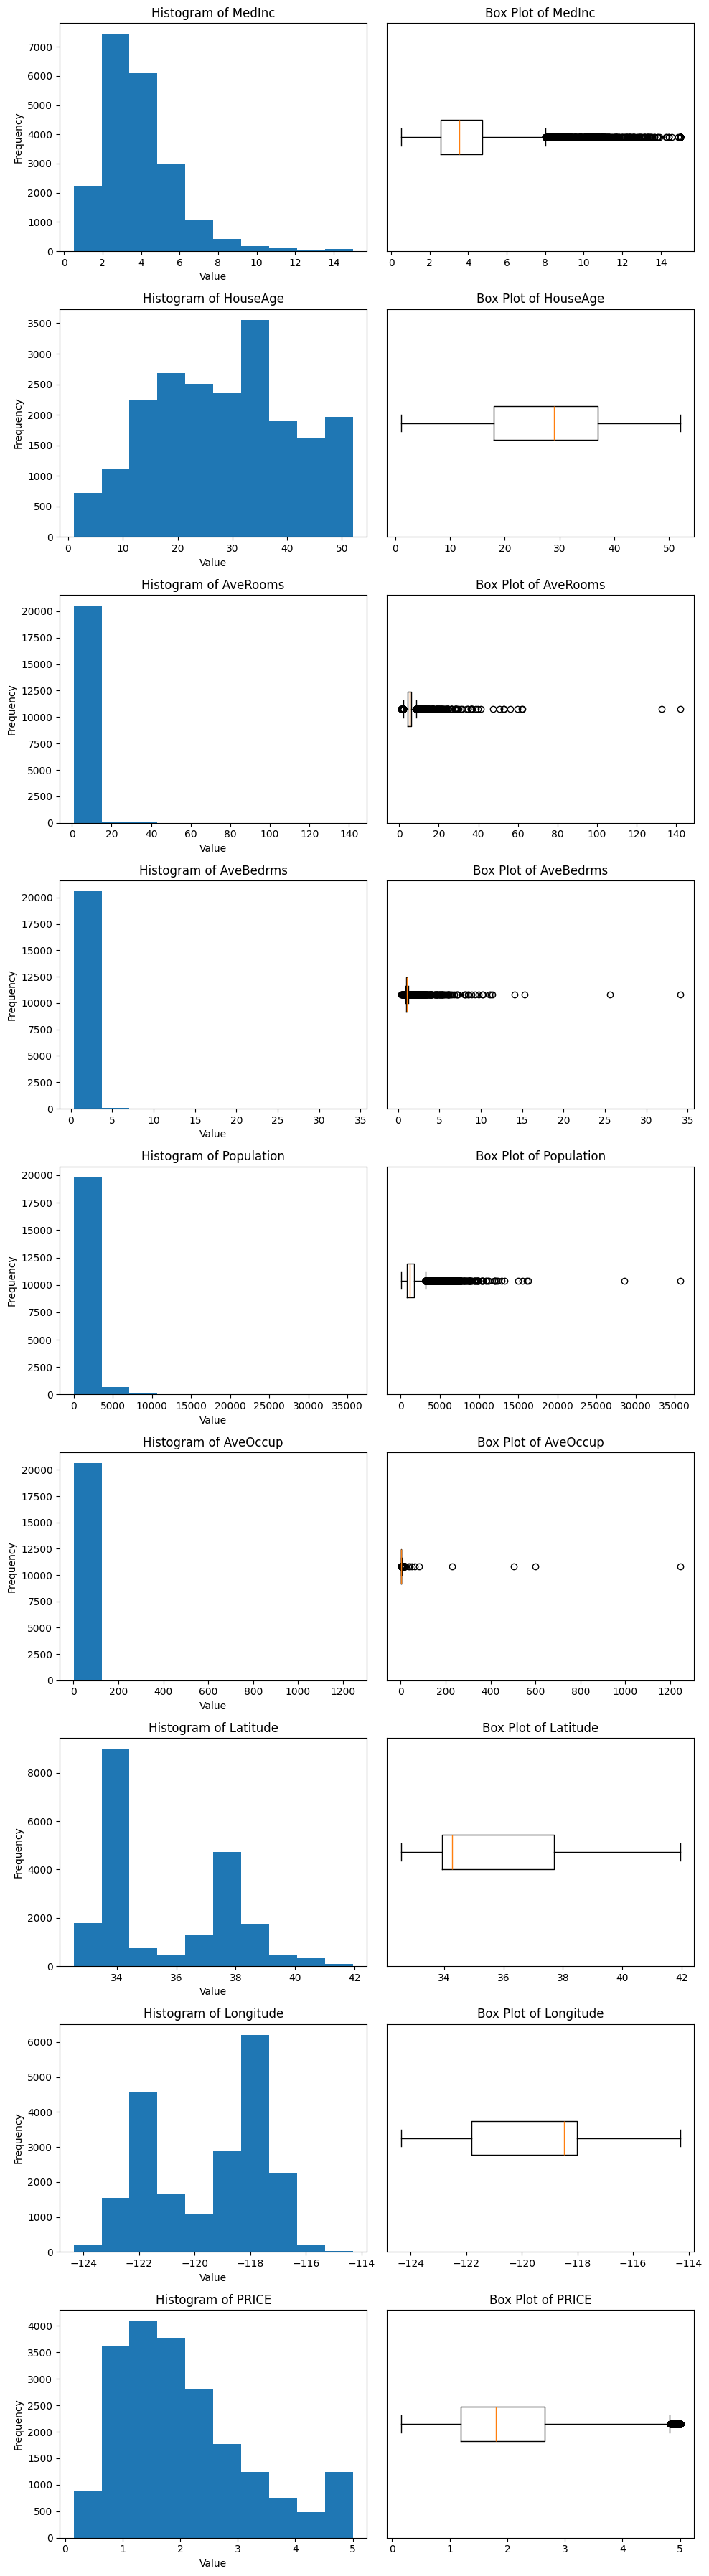

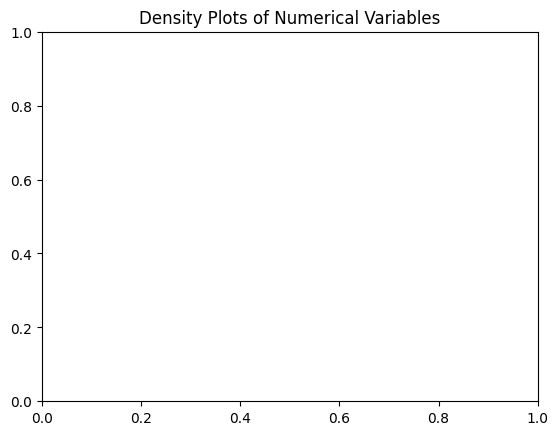

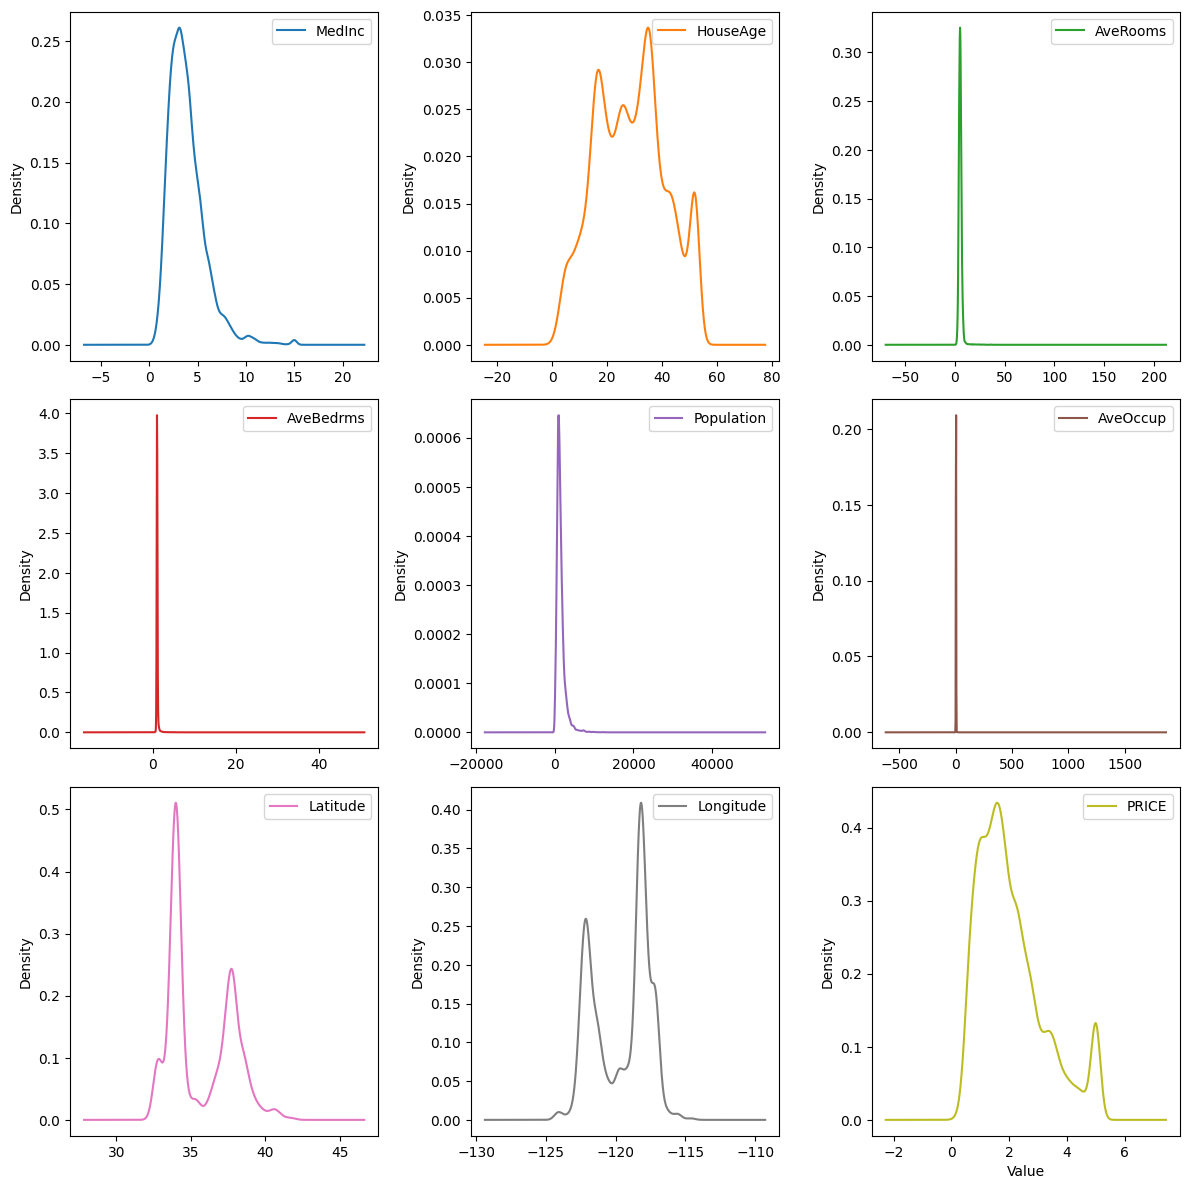

In [7]:
# Data Visualization
# Create histograms, box plots, and density plots for numerical variables
# plt.figure(figsize=(12, 4))

# Get numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns

# Create a figure and axes with subplots
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(10, 4*len(numerical_features)))  # Adjust size as needed

for i, feature in enumerate(numerical_features):
    # Plot histogram on the left (column 0)
    axes[i, 0].hist(data[feature])
    axes[i, 0].set_title(f'Histogram of {feature}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')

    # Plot box plot on the right (column 1)
    axes[i, 1].boxplot(data[feature], vert=False)
    axes[i, 1].set_title(f'Box Plot of {feature}')
    axes[i, 1].set_yticks([])  # Hide y ticks

plt.tight_layout()
plt.show()
# plt.subplot(1, 3, 3)
plt.title('Density Plots of Numerical Variables')
data.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(12, 12))
plt.xlabel('Value')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

## 4. Bivariate Analysis

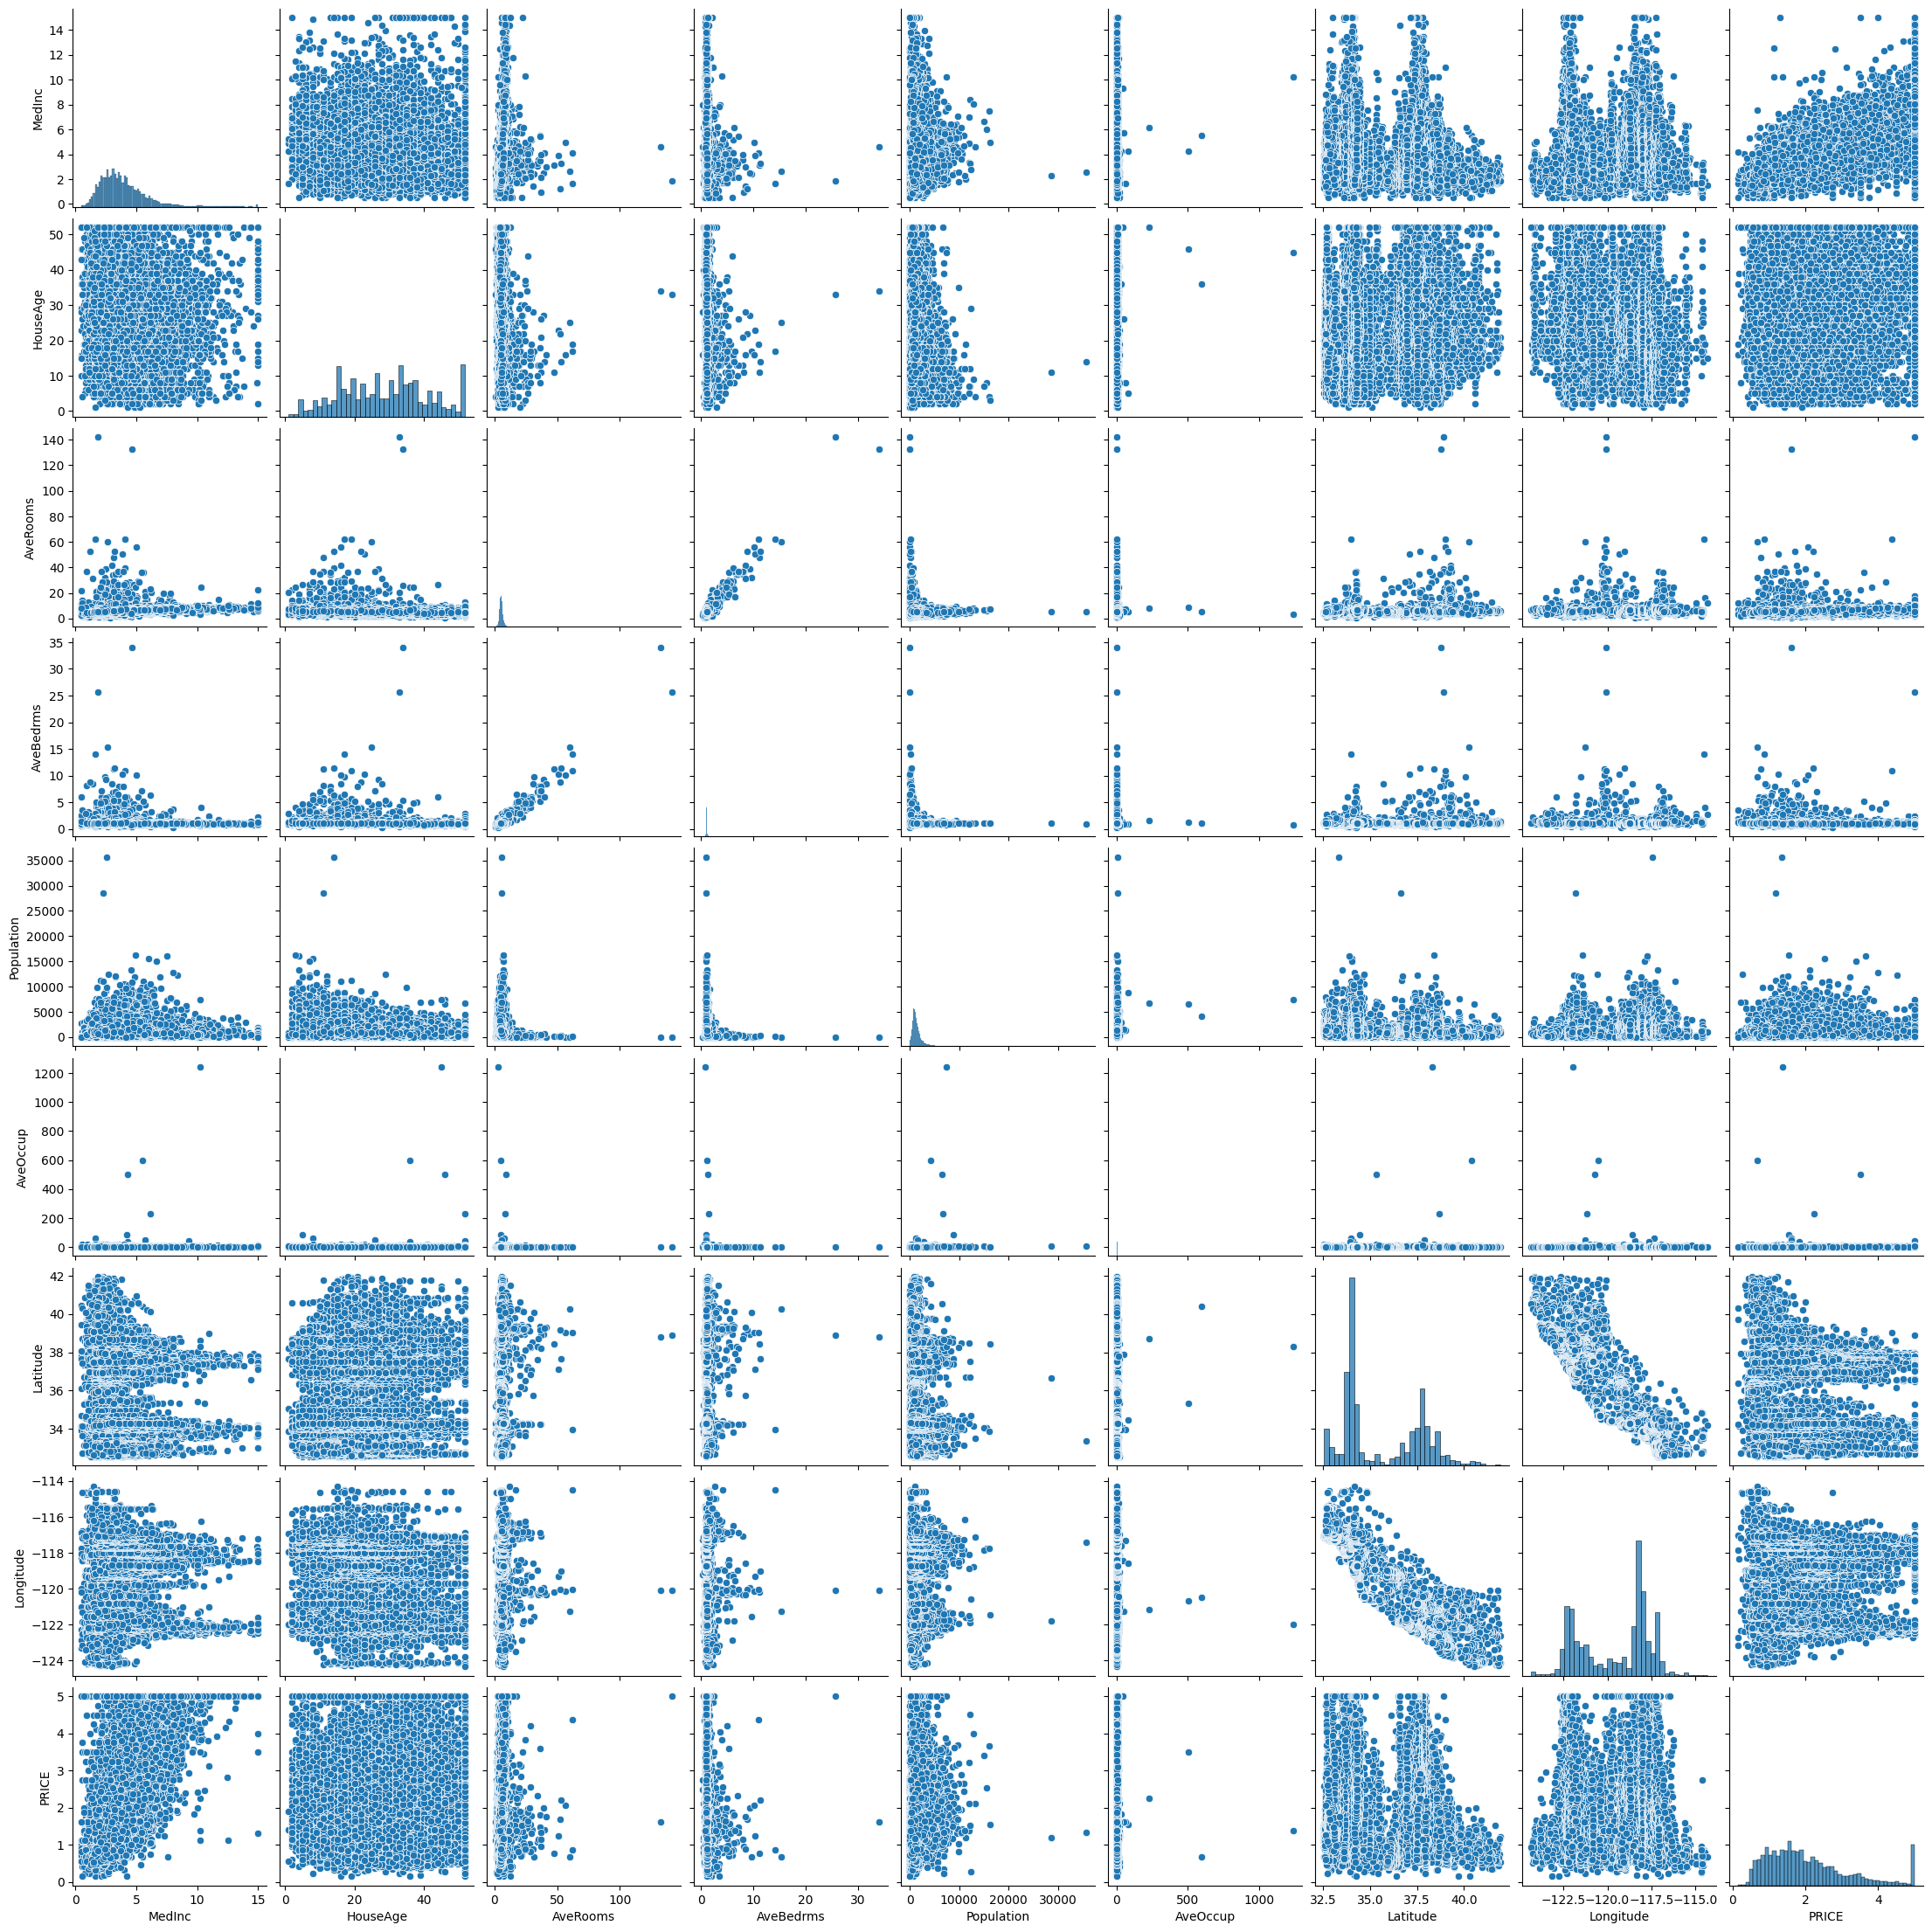

In [8]:
# Create pairplot to visualize the relationship between pairs of variables
sns.pairplot(data)
plt.show()

In [9]:
# Correlation Analysis
# Calculate the correlation matrix for numerical variables
corr_matrix = data.corr()
print(corr_matrix)

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
PRICE       0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude     PRICE  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Populatio

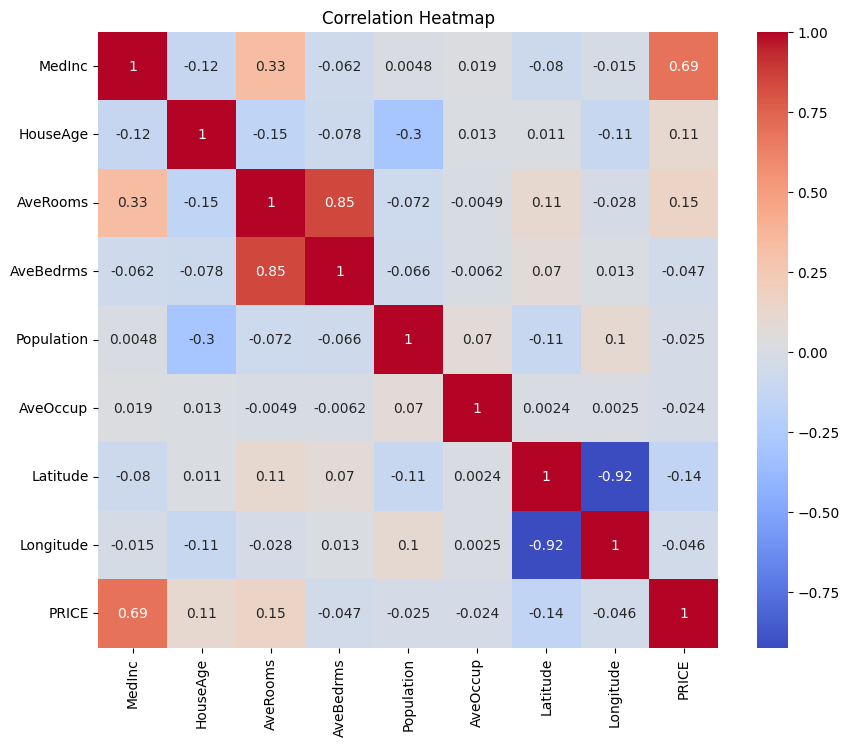

In [10]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 5. Multivariate Analysis

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [12]:
# Principal Component Analysis (PCA)
# Standardize the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('PRICE', axis=1))

In [13]:
# Perform PCA
pca = PCA()
pca.fit(scaled_data)

PCA()

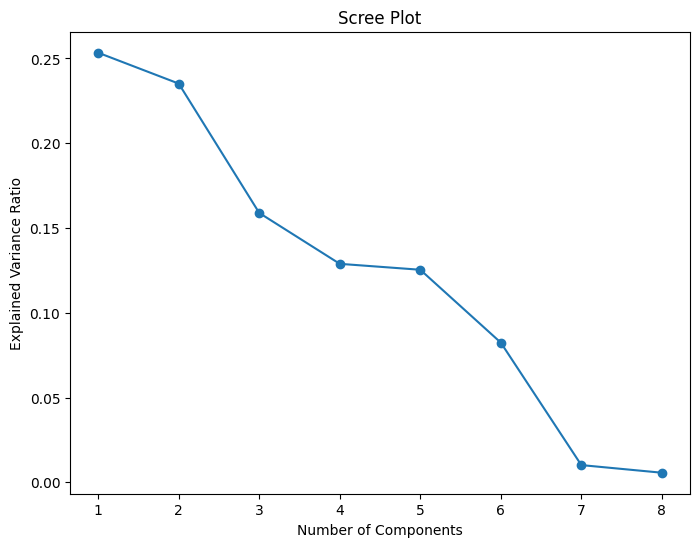

In [14]:
# Visualize the explained variance ratio using a scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()

In [15]:
# K-means Clustering
# Apply k-means clustering to identify natural groupings in the data
kmeans = KMeans(n_clusters=1, random_state=42)
kmeans.fit(scaled_data)
data['Cluster'] = kmeans.labels_

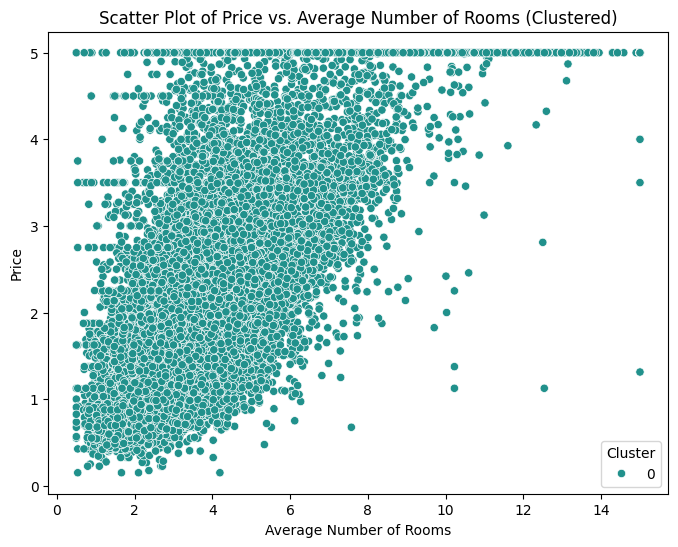

In [16]:
# Visualize the clusters using scatter plots
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MedInc', y='PRICE', hue='Cluster', data=data, palette='viridis')
plt.xlabel("Average Number of Rooms")
plt.ylabel("Price")
plt.title("Scatter Plot of Price vs. Average Number of Rooms (Clustered)")
plt.show()

## 6. Feature Importance

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [18]:
# Correlation with Target Variable
# Calculate the correlation between each feature and the target variable
corr_with_target = data.corr()['PRICE'].sort_values(ascending=False)
print("Correlation with Target Variable:")
print(corr_with_target)

Correlation with Target Variable:
PRICE         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Cluster            NaN
Name: PRICE, dtype: float64


In [19]:
# Permutation Importance
# Use Random Forest to calculate permutation importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(data.drop('PRICE', axis=1), data['PRICE'])
perm_importance = permutation_importance(rf, data.drop('PRICE', axis=1), data['PRICE'], n_repeats=10, random_state=42)


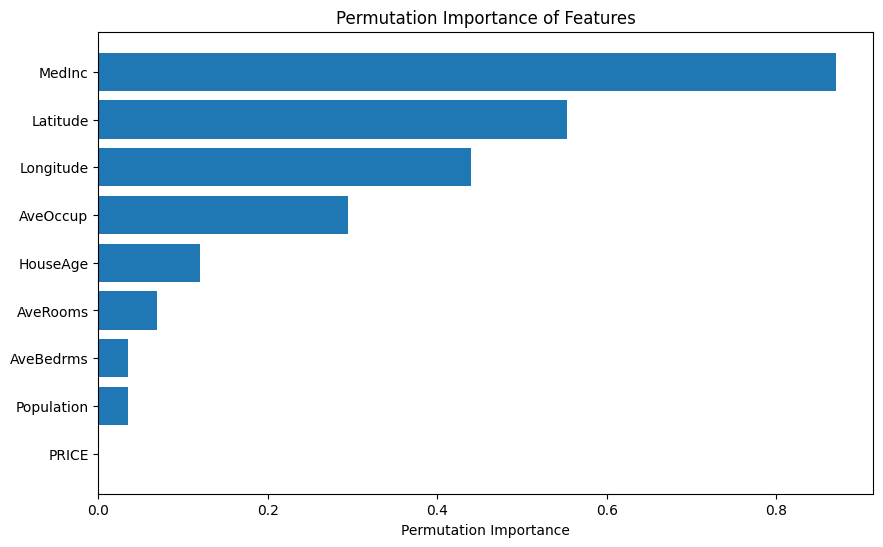

In [20]:
# Visualize the permutation importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(data.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Importance of Features")
plt.show()

## 7. Conclusion

Recap the key findings and insights from the EDA

- The price of houses in California varies significantly, with a mean price of $206,856 and a standard deviation of $115,395.
- There is a positive correlation between the MedInc and the price of houses.
- PCA analysis suggests that the first component explains a significant portion of the variance in the data.
- The most important features for predicting house prices are MedInc (median income), Latitude, and Longlitute.